In [1]:
import sys; sys.path.append('../')

In [2]:
open_ai_api= open("../openai_api_key.key", "r").read()
from agents import Agent, OpenAIChatGPT, set_global_llm, set_live_verbosity

set_live_verbosity(2)
openai_llm = OpenAIChatGPT(
    api_key=open_ai_api,
    model="gpt-4o-mini",
    temperature=0.7,
    top_p=0.9,
    max_tokens=2000
)

set_global_llm(openai_llm)

/Users/voldemort/Desktop/personal_projects/arc-mlu/notebooks/../notebooks/arc_helper.py:103: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


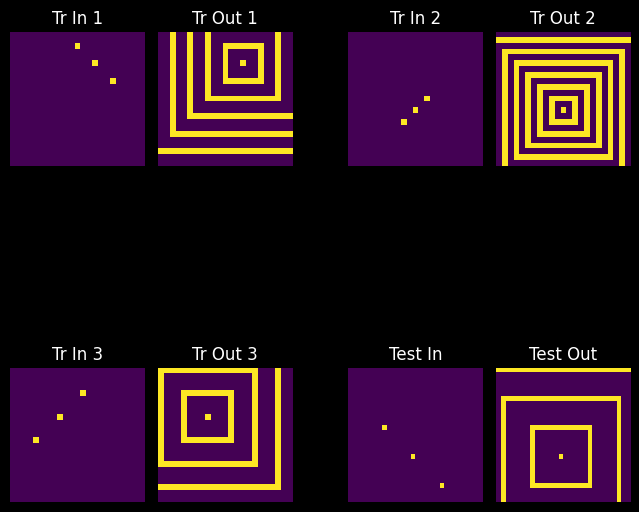

In [3]:
from notebooks.arc_helper import (convert_json_format, generate_string,
                                  plot_sample_matrices)

directory = "./ARC-800-tasks/training"  # Change this to your actual directory path
converted_data = convert_json_format(directory)
data=generate_string(converted_data)
plot_sample_matrices(converted_data[4])

In [4]:
from mlu import MLU

mlu = MLU(main_role="""
                    The goal is to construct the output grid(s) corresponding to the test input grid(s), 
                    using 3 trials for each test input. 'Constructing the output grid' involves picking 
                    the height and width of the output grid, then filling each cell in the grid with a symbol 
                    (integer between 0 and 9, which are visualized as colors). Learn to figure out the 
                    transformation rules and logic of image(matrix) from few given examples and apply it 
                    to the final test image(matrix). Analyze the given examples and predict the final 
                    image(matrix) for the given test image(matrix) and understand how to learn the 
                    transformation rules and logic of image(matrix) from few given examples to apply it 
                    to the final test image(matrix).
                    """,
    collection_name="knowledge_base_v-0.1",
    compress_knowledge=True,
    retrival_limit=15,
)

/opt/homebrew/Caskroom/miniconda/base/envs/voice-clone/lib/python3.10/site-packages/sentence_transformers/cross_encoder/CrossEncoder.py:11: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange



Starting Epoch 1



Training:   0%|          | 0/20 [00:00<?, ?it/s]

Pruned 15 old entries and added 6 new entries.


Delete of nonexisting embedding ID: ed6948b6-7182-4bc4-b40f-85ff68c8d195
Delete of nonexisting embedding ID: 8e48e149-f6f9-4a4a-9a3f-3bc04b278308
Delete of nonexisting embedding ID: b903d0c2-e8f1-4902-9250-359ea42135cd
Delete of nonexisting embedding ID: 98d96b4f-ae9c-4039-8219-422377b07140
Delete of nonexisting embedding ID: 1d854383-f1ff-46d3-bb1a-00f1fae6b60d
Delete of nonexisting embedding ID: be40308d-71c0-406e-be5e-60ebde15e8e1
Delete of nonexisting embedding ID: 3b8193f7-bad1-4314-888d-1017ae4f2247
Delete of nonexisting embedding ID: 65712619-73af-4ca3-8bb3-17547d0e2ded
Delete of nonexisting embedding ID: 6eef7cc7-20db-4ef4-9845-d2647aace277
Delete of nonexisting embedding ID: eb71db1a-748e-4d5c-a517-3c3eefbb0f8d
Delete of nonexisting embedding ID: fbe432fb-479d-48ad-b73f-b2c828ae71b0
Delete of nonexisting embedding ID: 5947a117-7352-4e4e-bb8a-4ff0891719e7
Delete of nonexisting embedding ID: 96f94121-ba89-431a-a16e-61bbecd56e23
Delete of nonexisting embedding ID: 15a9ee54-d9f3-4

Pruned 15 old entries and added 3 new entries.
DTW Score: 26.68332812825267


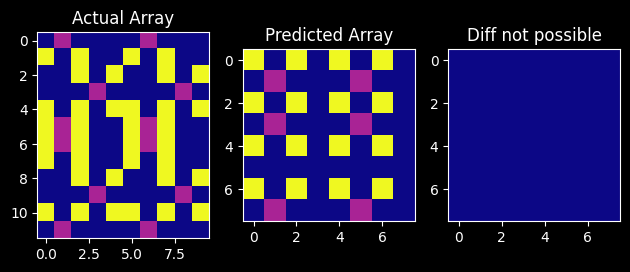

Training:   5%|▌         | 1/20 [01:13<23:18, 73.58s/it]

Pruned 15 old entries and added 8 new entries.


Delete of nonexisting embedding ID: 72432160-7d8e-4a5f-bb11-2c83cab02783
Delete of nonexisting embedding ID: b31c9992-5fe9-4a29-9c01-45e744ce29c3
Delete of nonexisting embedding ID: 87d1ab78-d1b2-4127-8d6e-9dd002d97548
Delete of nonexisting embedding ID: ce83fb5f-4d6a-442c-93e7-84a4cbb50721
Delete of nonexisting embedding ID: 380e0125-16cb-4a46-83fd-8996f12abe9c
Delete of nonexisting embedding ID: 342459f1-d930-4405-b631-6176d8644027
Delete of nonexisting embedding ID: 6b23c9b4-507e-43f7-9d09-8a221fc163d0
Delete of nonexisting embedding ID: 7e738354-0e24-4a8f-8de8-45d3d9e7a4e0
Delete of nonexisting embedding ID: 56c9a145-03ce-4a24-a3a5-3c8def527fff
Delete of nonexisting embedding ID: fca9934f-5ca0-4751-832d-c6de5cfce23f
Delete of nonexisting embedding ID: a1074b41-1b3a-498d-a805-26c54a9fa98c
Delete of nonexisting embedding ID: f70b084a-825e-499c-a7a0-74ac7d7fc9ac
Delete of nonexisting embedding ID: a56a7ae1-d444-44b7-a04e-262e5fefcc70
Delete of nonexisting embedding ID: 72432160-7d8e-4

Pruned 15 old entries and added 4 new entries.
DTW Score: 10.723805294763608


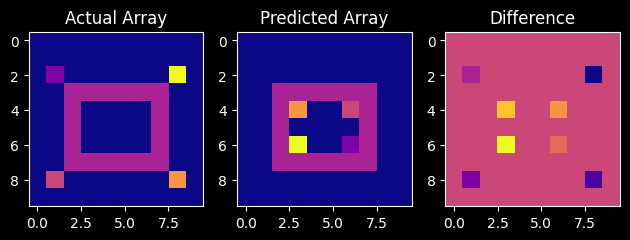

Training:  10%|█         | 2/20 [04:04<39:10, 130.57s/it]

Pruned 15 old entries and added 7 new entries.


Delete of nonexisting embedding ID: 6845c4a6-2382-47cd-abf7-0db830311926
Delete of nonexisting embedding ID: 775bfd3f-7e3b-40db-b688-ec436b0bb1dc
Delete of nonexisting embedding ID: f17ea866-074e-4962-a547-12bd367a966e
Delete of nonexisting embedding ID: 7f59c525-c659-4bdd-939a-7438761297a2
Delete of nonexisting embedding ID: ec9b83bc-abf3-4b6d-aaa8-6999fb5ec689
Delete of nonexisting embedding ID: e1aa7f56-3394-4896-ac4e-617dc4867004
Delete of nonexisting embedding ID: 9f556296-1848-44c1-8905-bc385c1d3225
Delete of nonexisting embedding ID: 06007d16-e2bb-4812-82ff-f786182e3745
Delete of nonexisting embedding ID: 2cd56306-4122-4ac5-805d-e7189bc7b754
Delete of nonexisting embedding ID: 32c353ac-d227-464f-b73e-263cbea737fe
Delete of nonexisting embedding ID: 5743b16f-aac2-4731-8371-ac61f6cb033d
Delete of nonexisting embedding ID: ca5ebae0-2317-4b75-99da-d2846e594e13
Delete of nonexisting embedding ID: 72c5c8f5-c239-483a-bb04-ee35abbda16f
Delete of nonexisting embedding ID: c4d9d0cb-9e6c-4

Pruned 15 old entries and added 4 new entries.
DTW Score: 26.90724809414742


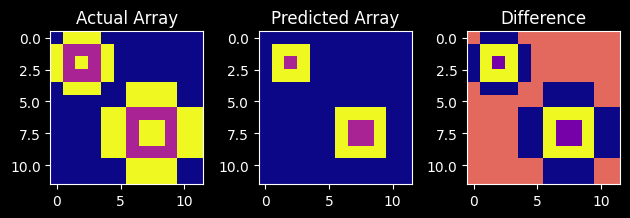

Training:  15%|█▌        | 3/20 [05:18<29:43, 104.91s/it]

Pruned 15 old entries and added 5 new entries.


Delete of nonexisting embedding ID: eb929d92-b117-4ea3-824b-87b4f98e8038
Delete of nonexisting embedding ID: 8c7871cc-5f9a-4356-9036-680d6a399311
Delete of nonexisting embedding ID: 21355f9c-7684-42c6-a382-49bd57d2a869
Delete of nonexisting embedding ID: 7f6f776c-af88-4fe4-8462-d85ec19d8b28
Delete of nonexisting embedding ID: 51b5a213-cab3-4f61-b947-2125a9007a20
Delete of nonexisting embedding ID: ae7ee1e8-2c13-4339-8c93-9f7649877379
Delete of nonexisting embedding ID: ef6052e3-8fd4-4f6f-8388-42d21650c43c
Delete of nonexisting embedding ID: 9f2df322-4aa2-4bc1-9c44-7dbc264b92f9
Delete of nonexisting embedding ID: 7b067c95-ad8b-4ab6-9fe5-f4406181f3b2
Delete of nonexisting embedding ID: cda40735-58e0-40f0-9173-4420670b738f
Delete of nonexisting embedding ID: 3dbaff9a-7d44-4d63-b8b0-b232a2358c96
Delete of nonexisting embedding ID: f0731619-3640-402f-be56-2985ab03dfb6
Delete of nonexisting embedding ID: 688cbbdd-6fb2-4a0b-886f-0d359f8ce7b8
Delete of nonexisting embedding ID: 6d4717c6-21a9-4

Pruned 15 old entries and added 4 new entries.
Response is not parsable
DTW Score: 0.0


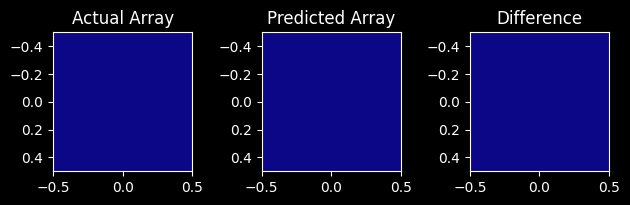

Training:  20%|██        | 4/20 [06:21<23:35, 88.45s/it] 

Pruned 15 old entries and added 9 new entries.


Delete of nonexisting embedding ID: f7df2015-455d-4f43-8577-2b843b29a7d3
Delete of nonexisting embedding ID: 718bfcd7-6f21-4831-9b97-e03275b346c0
Delete of nonexisting embedding ID: 0c604475-bcd0-4ddf-a595-306a59d05d4d
Delete of nonexisting embedding ID: cc4a6f65-50a8-4802-b3e6-af3abe96954b
Delete of nonexisting embedding ID: 44544971-3169-45d1-a231-d685eb4547a5
Delete of nonexisting embedding ID: e83548cf-44e6-47a3-8fc2-af62afa09be0
Delete of nonexisting embedding ID: 4235c593-cd36-4b83-ad1c-0fd1f6836357
Delete of nonexisting embedding ID: bdf1cfdc-4841-404b-801e-1b3ec91559ff
Delete of nonexisting embedding ID: ed202936-9e8c-4395-acb9-ec82289f65e8
Delete of nonexisting embedding ID: 9794b8bb-def6-4d37-af0c-f1b14bd810bf
Delete of nonexisting embedding ID: f7df2015-455d-4f43-8577-2b843b29a7d3
Delete of nonexisting embedding ID: 718bfcd7-6f21-4831-9b97-e03275b346c0
Delete of nonexisting embedding ID: 0c604475-bcd0-4ddf-a595-306a59d05d4d
Delete of nonexisting embedding ID: cc4a6f65-50a8-4

Pruned 15 old entries and added 6 new entries.
Response is not parsable
DTW Score: 0.0


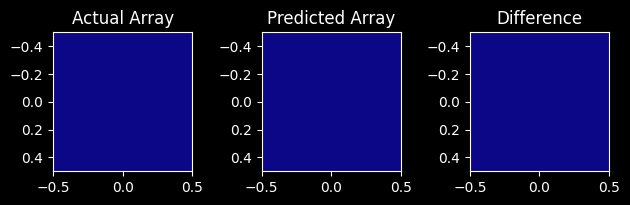

Training:  25%|██▌       | 5/20 [07:46<21:45, 87.04s/it]

Pruned 15 old entries and added 10 new entries.


Delete of nonexisting embedding ID: 3d20fdb5-c0c6-4f04-ba97-71d8573ed43a
Delete of nonexisting embedding ID: 4918f363-d76c-4daf-b53a-766439a0032a
Delete of nonexisting embedding ID: f552470c-c56b-47f1-8f91-35100fe30718
Delete of nonexisting embedding ID: 188ee43a-c7ee-45ef-ad39-aa69669ee417
Delete of nonexisting embedding ID: 93581a22-f45c-4bf0-9731-06742835c3a3
Delete of nonexisting embedding ID: 9482597c-4ec4-4b0b-8a49-5732e3b79066
Delete of nonexisting embedding ID: c3fc77f7-1e39-4b80-b03e-7ceede3a3708
Delete of nonexisting embedding ID: f09e4a9a-139e-4a49-848e-98d6975bd744
Delete of nonexisting embedding ID: 109b653c-feb6-4cc2-9512-4ceac63a09e6
Delete of nonexisting embedding ID: 3dffc6c4-1db1-47a6-a95c-bbd0696d3338
Delete of nonexisting embedding ID: 51f13bae-30f6-4e11-a351-0e9e8f17e940
Delete of nonexisting embedding ID: 3d20fdb5-c0c6-4f04-ba97-71d8573ed43a
Delete of nonexisting embedding ID: 4918f363-d76c-4daf-b53a-766439a0032a
Delete of nonexisting embedding ID: f552470c-c56b-4

Pruned 15 old entries and added 5 new entries.
DTW Score: 26.267851073127396


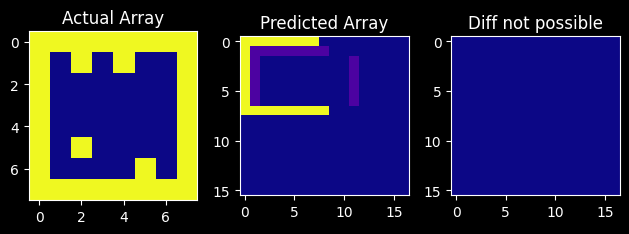

Training:  30%|███       | 6/20 [11:00<28:50, 123.63s/it]

In [7]:
from train_test_helper import train_and_evaluate

from logical_agents import logic_concept_reasoning_network

reasoning_iterations=4
reasoning_agent=lambda prompt,input: logic_concept_reasoning_network(f"{prompt}\n{input}", max_iterations=reasoning_iterations)

set_live_verbosity(0)

n = 20 # 10 + 20
import random

selected_data = random.sample(data, n)

results, train_dtw_scores, test_dtw_scores=train_and_evaluate(
    dataset=selected_data,  
    mlu=mlu,
    prompt_key="query",
    response_key="reply",
    epochs=1,
    test_size=0,
    train_batch_size=1,
    test_batch_size=1,
    initial_serial_items=1,
    logging=True,
    training_analysis_agent = reasoning_agent,
    testing_analysis_agent = reasoning_agent,
)

In [ ]:
print(train_dtw_scores, test_dtw_scores)

[0.0, [0.0], [0.0], [9.539392014169456], [0.0], [17.776388834631177], [2.0], [3.0], [0.0], [0.0]] []


In [ ]:
#[0.0, [0.0], [0.0], [9.539392014169456], [0.0], [17.776388834631177], [2.0], [3.0], [0.0], [0.0]] []